<a href="https://colab.research.google.com/github/Prk2706/TopDetection/blob/main/Copy_of_TopDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install required packages
!pip install -q tflite-model-maker
!pip install -q tflite-support

     |████████████████████████████████| 642 kB 5.1 MB/s 
     |████████████████████████████████| 1.1 MB 63.8 MB/s 
     |████████████████████████████████| 3.4 MB 57.3 MB/s 
     |████████████████████████████████| 87 kB 8.4 MB/s 
     |████████████████████████████████| 1.2 MB 22.7 MB/s 
     |████████████████████████████████| 840 kB 4.0 MB/s 
     |████████████████████████████████| 128 kB 75.4 MB/s 
     |████████████████████████████████| 238 kB 76.3 MB/s 
     |████████████████████████████████| 55.3 MB 1.2 MB/s 
     |████████████████████████████████| 10.9 MB 28.0 MB/s 
     |████████████████████████████████| 596 kB 74.5 MB/s 
     |████████████████████████████████| 78 kB 8.9 MB/s 
     |████████████████████████████████| 25.3 MB 91.1 MB/s 
     |████████████████████████████████| 352 kB 50.4 MB/s 
     |████████████████████████████████| 99 kB 12.1 MB/s 
     |████████████████████████████████| 40 kB 7.5 MB/s 
     |████████████████████████████████| 77 kB 7.8 MB/s 
     |█████████████████

In [ ]:
#import packages and libraries
import numpy as np
import pandas as pd
import os

from tflite_model_maker.config import ExportFormat, QuantizationConfig
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

from tflite_support import metadata

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [ ]:
import os
os.chdir("/content/drive/MyDrive/TopsData")

In [ ]:
!ls

images	train.csv  train_labels  val.csv  val_labels


In [ ]:
!pip install detecto
import detecto
from detecto import utils
detecto.utils.xml_to_csv('train_labels', 'train.csv')
detecto.utils.xml_to_csv('val_labels', 'val.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,img_00000100.jpg,512,512,Tops,179,81,287,227,0
1,img_00000099.jpg,236,341,Tops,42,100,169,300,1
2,img_00000098.jpg,402,512,Tops,99,116,292,451,2
3,img_00000097.jpg,384,512,Tops,62,155,306,452,3
4,img_00000096.jpg,308,452,Tops,56,116,260,368,4
5,img_00000095.jpg,200,250,Tops,52,66,134,198,5
6,img_00000094.jpg,512,512,Tops,189,162,362,446,6
7,img_00000093.jpg,300,300,Tops,43,70,189,225,7
8,img_00000092.jpg,200,250,Tops,63,59,172,172,8
9,img_00000091.jpg,512,512,Tops,87,63,430,509,9


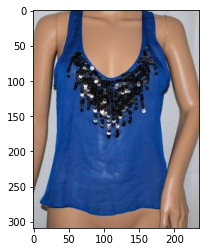

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image = img.imread('images/img_00000071.jpg')
plt.imshow(image)
plt.show()

In [ ]:
from torchvision import transforms
from detecto import core
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

In [ ]:
dataset = detecto.core.Dataset('train.csv', 'images/', transform=transform_img)

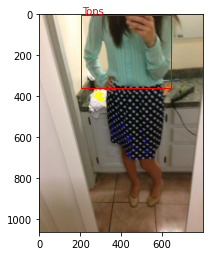

In [ ]:
from detecto import visualize
image, information = dataset[50] 
detecto.visualize.show_labeled_image(image, information['boxes'], information['labels'])

In [ ]:
dataloader = detecto.core.DataLoader(dataset)
dataloader

In [ ]:
validation_data = detecto.core.Dataset('val.csv', 'images/')

In [ ]:
categories = ['Tops']
classifier = core.Model(categories)

In [ ]:
history = classifier.fit(dataloader, validation_data, epochs = 10, verbose = True)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 67/67 [00:19<00:00,  3.48it/s]


Begin iterating over validation dataset


100%|██████████| 30/30 [00:03<00:00,  7.93it/s]


Loss: 0.1658302682141463
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 67/67 [00:18<00:00,  3.57it/s]


Begin iterating over validation dataset


100%|██████████| 30/30 [00:03<00:00,  8.34it/s]


Loss: 0.14924394463499388
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 67/67 [00:18<00:00,  3.64it/s]


Begin iterating over validation dataset


100%|██████████| 30/30 [00:03<00:00,  8.38it/s]


Loss: 0.15530548306802908
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 67/67 [00:18<00:00,  3.63it/s]


Begin iterating over validation dataset


100%|██████████| 30/30 [00:03<00:00,  8.26it/s]


Loss: 0.1377565637230873
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 67/67 [00:18<00:00,  3.58it/s]


Begin iterating over validation dataset


100%|██████████| 30/30 [00:03<00:00,  8.13it/s]


Loss: 0.15461682801445326
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 67/67 [00:18<00:00,  3.57it/s]


Begin iterating over validation dataset


100%|██████████| 30/30 [00:03<00:00,  8.15it/s]


Loss: 0.14339078838626543
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 67/67 [00:18<00:00,  3.60it/s]


Begin iterating over validation dataset


100%|██████████| 30/30 [00:03<00:00,  8.28it/s]


Loss: 0.13765010610222816
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 67/67 [00:18<00:00,  3.61it/s]


Begin iterating over validation dataset


100%|██████████| 30/30 [00:03<00:00,  8.30it/s]


Loss: 0.13224104767044384
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 67/67 [00:18<00:00,  3.59it/s]


Begin iterating over validation dataset


100%|██████████| 30/30 [00:03<00:00,  8.21it/s]


Loss: 0.1290919045607249
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 67/67 [00:18<00:00,  3.58it/s]


Begin iterating over validation dataset


100%|██████████| 30/30 [00:03<00:00,  8.25it/s]

Loss: 0.1282199556628863


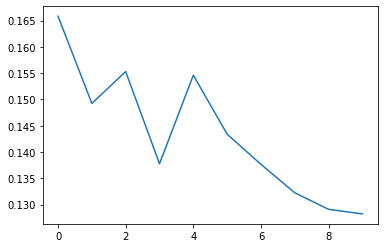

In [ ]:
plt.plot(history)

In [ ]:
images = []
for i in range(0,30,3):
  image,_ = validation_data[i]
  images.append(image)
image.shape

torch.Size([3, 512, 416])

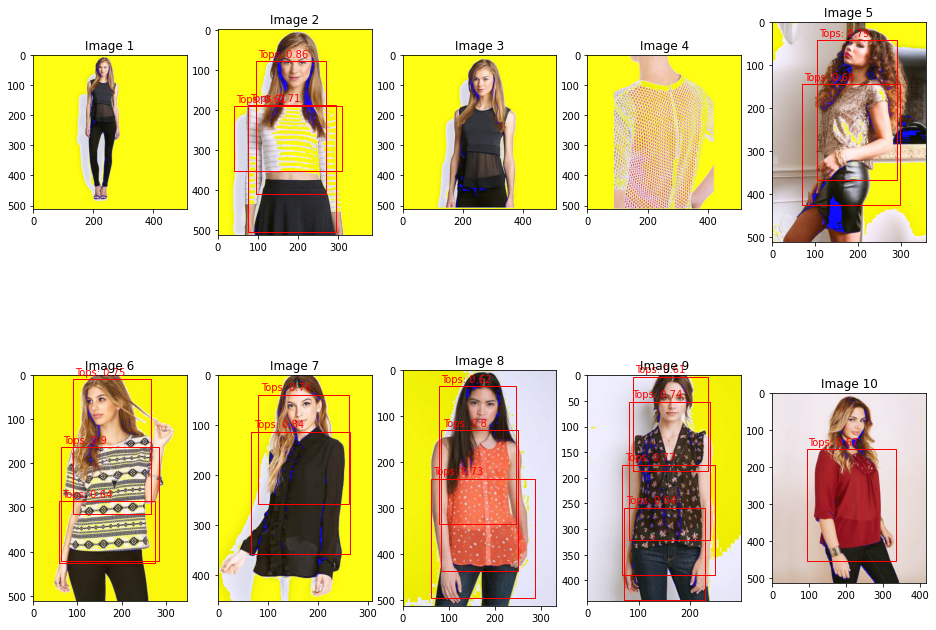

In [ ]:
visualize.plot_prediction_grid(classifier, images,dim=(2, 5), figsize=(16, 12),)#,score_filter=0.7)